<a href="https://colab.research.google.com/github/erobertson-machine-learning/embeddings/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings for text 
- Source https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb#scrollTo=zX4Kg8DUTKWO
- Video https://www.youtube.com/watch?v=Y_hzMnRXjhI
- Data found here : http://jmcauley.ucsd.edu/data/amazon/

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading Data

In [0]:
import json

In [0]:
# Load in the data
data_file = open('drive/My Drive/Colab Notebooks/data/reviews_Office_Products', 'r') 
json_lines = data_file.readlines()
data_raw = [ json.loads(line) for line in json_lines ]
data_raw[:3]

[{'asin': 'B00000JBLH',
  'helpful': [3, 4],
  'overall': 5.0,
  'reviewText': "I bought my first HP12C in about 1984 or so, and it served me faithfully until 2002 when I lost it while travelling.  I searched for another one to replace it, but found one difficult to come by in my area.  So, I decided to buy up and purchased an HP 49G.  What a mistake!  I know that many people view the HP 49G (now 49G+) as the flagship of the HP line, but for me that was a disaster.The 49G may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.  The 12C, on the other hand, does what I need in a way that makes good sense to me.If you are looking for a solid, reliable calculator, the HP12C may be for you.  It's programmable.  It does basic statistics well, and many business applications too.  The manual makes sense; you will be up and running in short order.I'm ready to set my 49G aside and move back to my old friend.  I didn't even have to replace the batteries i

In [0]:
# Clean data, only need text and raiting
data = [ (d['reviewText'], d['overall']) for d in data_raw ]
data[:3]

[("I bought my first HP12C in about 1984 or so, and it served me faithfully until 2002 when I lost it while travelling.  I searched for another one to replace it, but found one difficult to come by in my area.  So, I decided to buy up and purchased an HP 49G.  What a mistake!  I know that many people view the HP 49G (now 49G+) as the flagship of the HP line, but for me that was a disaster.The 49G may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.  The 12C, on the other hand, does what I need in a way that makes good sense to me.If you are looking for a solid, reliable calculator, the HP12C may be for you.  It's programmable.  It does basic statistics well, and many business applications too.  The manual makes sense; you will be up and running in short order.I'm ready to set my 49G aside and move back to my old friend.  I didn't even have to replace the batteries in well over a decade of use!HP 12C, I'm coming home!",
  5.0),
 ('WHY THIS BE

## Balence Data

In [0]:
length = len(data)
length

53258

In [0]:
def CountFrequency(my_list):   
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [0]:
# Very Heavilty skewed towards 5 star raitings
raitings = [ d[1] for d in data ]
reviews = [ d[0] for d in data ]
frequencies = CountFrequency( raitings )
frequencies

{1.0: 1130, 2.0: 1726, 3.0: 5060, 4.0: 15015, 5.0: 30327}

In [0]:
# Ballence data as best as possible
# 1-4 stars => bad, 5 stars => good
raitings = list(map( lambda x: x == 5, raitings ))
CountFrequency( raitings )

{False: 22931, True: 30327}

In [0]:
# trunkate extra 5-stars
max5Stars = length - frequencies[5]
ballenced_raitings = []
ballenced_reviews = []
for i in range(len(reviews)):
  if raitings[i] :
    max5Stars -= 1
    if max5Stars >= 0:
      ballenced_raitings.append( raitings[i] )
      ballenced_reviews.append( reviews[i] )
  else:
    ballenced_raitings.append( raitings[i] )
    ballenced_reviews.append( reviews[i] )
print( ballenced_raitings[:5] )
print( ballenced_reviews[:5] )

[True, True, False, True, True]
["I bought my first HP12C in about 1984 or so, and it served me faithfully until 2002 when I lost it while travelling.  I searched for another one to replace it, but found one difficult to come by in my area.  So, I decided to buy up and purchased an HP 49G.  What a mistake!  I know that many people view the HP 49G (now 49G+) as the flagship of the HP line, but for me that was a disaster.The 49G may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.  The 12C, on the other hand, does what I need in a way that makes good sense to me.If you are looking for a solid, reliable calculator, the HP12C may be for you.  It's programmable.  It does basic statistics well, and many business applications too.  The manual makes sense; you will be up and running in short order.I'm ready to set my 49G aside and move back to my old friend.  I didn't even have to replace the batteries in well over a decade of use!HP 12C, I'm coming

In [0]:
# Perfectly ballenced, as all things should be
CountFrequency( ballenced_raitings )

{False: 22931, True: 22931}

## Randomize the array

In [0]:
import random

In [0]:
combined_data = []
for i in range(len( ballenced_raitings )):
  combined_data.append( ( ballenced_raitings[i], ballenced_reviews[i] ) )
random.shuffle( combined_data )
[ a[0] for a in combined_data ][:20]

[True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True]

In [0]:
ballenced_raitings = [ a[0] for a in combined_data ]
ballenced_reviews = [a[1] for a in combined_data]

## Tokenize the data

In [0]:
maxlength = 150
dimension = 16
vocabulary = 8000

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
# Takes first 44000 cases for training data
train_data_sentences = ballenced_reviews[:44000]
train_data_raiting = ballenced_raitings[:44000]
test_data_sentences = ballenced_reviews[44000:]
test_data_raiting = ballenced_raitings[44000:]

In [0]:
# Word Tokenizing
## Will take the 'vocabulary' most common words and tokenize them
tokenizer = Tokenizer(num_words=vocabulary,oov_token='--oov--')
tokenizer.fit_on_texts( train_data_sentences )

# There are 13972 unique words, we are cutting that down to 'vocabulary'
print('Found %d unique words.' % len(tokenizer.word_index))

Found 51950 unique words.


In [0]:
# Run our train data through the tokenizer
train_data_sequences = tokenizer.texts_to_sequences(train_data_sentences)
training_data_padded = pad_sequences(train_data_sequences, padding='post', truncating='post', maxlen=maxlength)

test_data_sequences = tokenizer.texts_to_sequences(test_data_sentences)
testing_data_padded = pad_sequences(test_data_sequences, padding='post', truncating='post', maxlen=maxlength)

# Our data is now padded to the first maxlength word per review
training_data_padded 

array([[ 125,    4,   33, ...,    0,    0,    0],
       [  28,   17,  228, ...,    0,    0,    0],
       [   6,   35,    2, ...,    0,    0,    0],
       ...,
       [  28,   73,   17, ...,    0,    0,    0],
       [  11,    8,    4, ...,    0,    0,    0],
       [  18, 3374,  201, ...,    0,    0,    0]], dtype=int32)

## Model

In [0]:
import numpy as np

In [0]:
train_X = np.array(training_data_padded)
train_Y = np.array(train_data_raiting)
test_X = np.array(testing_data_padded)
test_Y = np.array(test_data_raiting)

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.Sequential([
    #  total words in our vocab, each word is given a  dimensional representation, each input is  tokens long
    tf.keras.layers.Embedding(vocabulary, dimension, input_length=maxlength),
    # Each sentence is represented by the sum of each tokenized vector it contains
    tf.keras.layers.GlobalAveragePooling1D(),
    # each vector is then sent through a 24 node dense layer
    tf.keras.layers.Dropout(.2, input_shape=(dimension,)),
    tf.keras.layers.Dense(dimension, activation='relu'),
    # and given a final output of 0 or 1
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 150, 16)           128000    
_________________________________________________________________
global_average_pooling1d_12  (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 128,289
Trainable params: 128,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 15
history = model.fit(train_X, train_Y, epochs=num_epochs, validation_data=(test_X, test_Y), verbose=2)

Epoch 1/15
1375/1375 - 4s - loss: 0.6087 - accuracy: 0.6698 - val_loss: 0.5520 - val_accuracy: 0.7266
Epoch 2/15
1375/1375 - 4s - loss: 0.5201 - accuracy: 0.7503 - val_loss: 0.5346 - val_accuracy: 0.7368
Epoch 3/15
1375/1375 - 4s - loss: 0.4898 - accuracy: 0.7682 - val_loss: 0.5353 - val_accuracy: 0.7401
Epoch 4/15
1375/1375 - 4s - loss: 0.4715 - accuracy: 0.7797 - val_loss: 0.5331 - val_accuracy: 0.7444
Epoch 5/15
1375/1375 - 4s - loss: 0.4585 - accuracy: 0.7874 - val_loss: 0.5440 - val_accuracy: 0.7347
Epoch 6/15
1375/1375 - 4s - loss: 0.4493 - accuracy: 0.7950 - val_loss: 0.5443 - val_accuracy: 0.7427
Epoch 7/15
1375/1375 - 4s - loss: 0.4400 - accuracy: 0.8004 - val_loss: 0.5488 - val_accuracy: 0.7390
Epoch 8/15
1375/1375 - 4s - loss: 0.4318 - accuracy: 0.8062 - val_loss: 0.5641 - val_accuracy: 0.7352
Epoch 9/15
1375/1375 - 4s - loss: 0.4217 - accuracy: 0.8114 - val_loss: 0.5723 - val_accuracy: 0.7363
Epoch 10/15
1375/1375 - 4s - loss: 0.4144 - accuracy: 0.8133 - val_loss: 0.5754 - 

## Visualizing progress

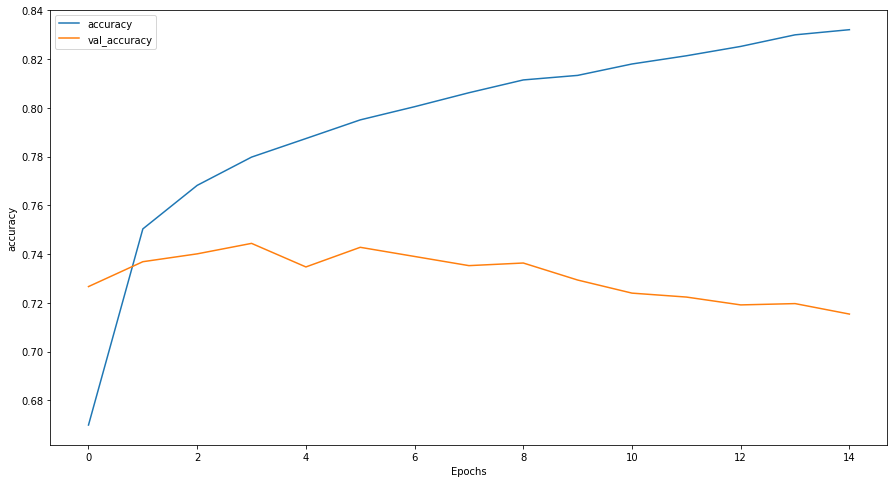

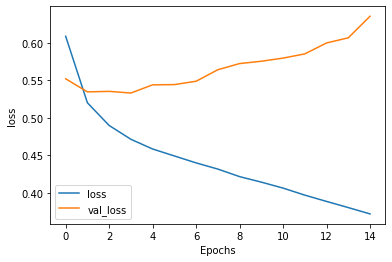

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,8))

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
# Sentiment is  having some major issues with over fitting
# Maybe i should try phrases instead of words as tokens?

## Using the model

In [0]:
input_text = ["I really liked the product, quality ink. However it was terrible and i hate it. I wil recoment it to everyone because I love it. I lied. It sucks. I hate everything"]

In [0]:
sequences = tokenizer.texts_to_sequences(input_text)

In [0]:
running_predictions = []
for i in range (len(sequences[0])):
  padded = pad_sequences( [sequences[0][:(i+1)]], maxlen=maxlength, padding='post', truncating='post')
  running_predictions.append((input_text[0].split(' ')[i], model.predict(padded)[0][0]))

In [0]:
running_predictions

[('I', 0.80614406),
 ('really', 0.8208615),
 ('liked', 0.65399647),
 ('the', 0.6342448),
 ('product,', 0.62546325),
 ('quality', 0.6721033),
 ('ink.', 0.6661563),
 ('However', 0.26957095),
 ('it', 0.25567177),
 ('was', 0.24248546),
 ('terrible', 0.067963436),
 ('and', 0.074188836),
 ('i', 0.07848932),
 ('hate', 0.060355727),
 ('it.', 0.0577952),
 ('I', 0.0605653),
 ('wil', 0.063043125),
 ('recoment', 0.06561523),
 ('it', 0.062176157),
 ('to', 0.06009944),
 ('everyone', 0.09269334),
 ('because', 0.09134161),
 ('I', 0.09715598),
 ('love', 0.19616239),
 ('it.', 0.18508907),
 ('I', 0.19804075),
 ('lied.', 0.20614485),
 ('It', 0.19464451),
 ('sucks.', 0.1322276),
 ('I', 0.1409054),
 ('hate', 0.10890464),
 ('everything', 0.17652653)]

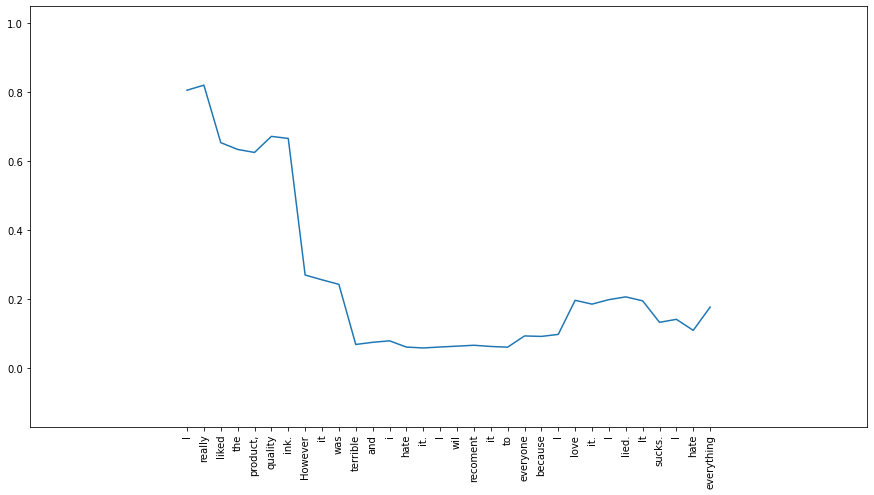

In [0]:
plt_x = [ a[0] for a in running_predictions ]
plt_y = [ a[1] for a in running_predictions ]
xValues = [ a for a in range(len(running_predictions))]

figure(figsize=(15,8))
plt.plot( xValues, plt_y)
plt.xticks( xValues, plt_x, rotation='vertical' )
plt.margins(0.3)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [0]:
running_predictions = []
for i in range (len(sequences[0])):
  if ( i < 10 ):
    padded = pad_sequences( [sequences[0][:(i+1)]], maxlen=maxlength, padding='post', truncating='post')
    running_predictions.append((input_text[0].split(' ')[i], model.predict(padded)[0][0]))
  else:
    padded = pad_sequences( [sequences[0][(i-10):(i+1)]], maxlen=maxlength, padding='post', truncating='post')
    running_predictions.append((input_text[0].split(' ')[i], model.predict(padded)[0][0]))

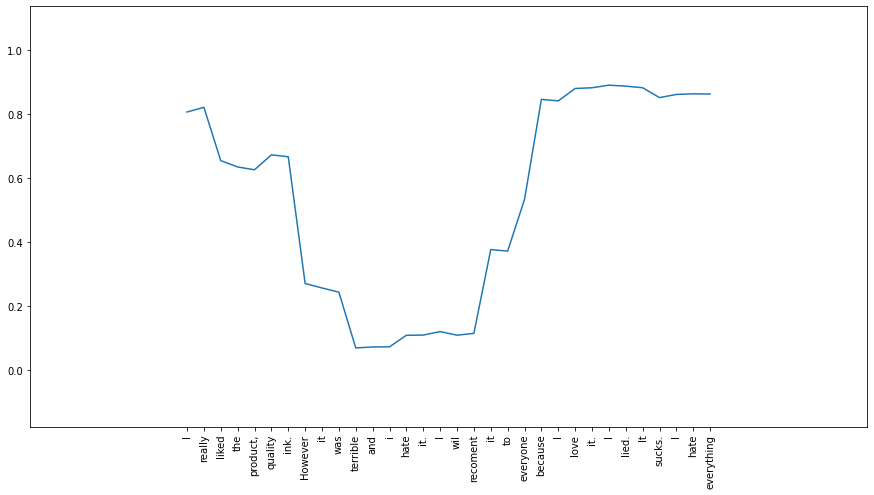

In [0]:
plt_x = [ a[0] for a in running_predictions ]
plt_y = [ a[1] for a in running_predictions ]
xValues = [ a for a in range(len(running_predictions))]

figure(figsize=(15,8))
plt.plot( xValues, plt_y)
plt.xticks( xValues, plt_x, rotation='vertical' )
plt.margins(0.3)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Conclusion

Created a sentiment analysis model from ~50K amazon reviews for office appliances, Worked decently well. Needs to take into account more than just the word itselfs sentiment and factor in the sorounding words aswell.